# House Prices - Advanced Regression Techniques

When looking for inspiration for this Deep Learning project, I found a list of potential project ideas that had datasets and challenges associated with the parameters of this class. There was potential for me to learn about Stock Price Prediction, Weather forecasting, and even a Pneumonia detector. What I ended up feeling inspired by most was to take on the House Prices Model using Advanced Regression Techniques. My girlfriend and I are currently looking at houses, so this topic felt very interesting for what else is going in on my life outside of this class. Additionally, when I was looking at the Kaggle Project, the data comes from home prices in Ames, IA. I did my undergrad at Iowa State University and that is in Ames, IA so I was extremely excited that it felt like this project idea was perfect for me.

## Problem

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

The problem is that it might seem that prices of homes can be unpredicatable, so the goal is to predict the sales price for each house.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

C:\Users\rcoms\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rcoms\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\rcoms\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Data

The data comes from a Kaggle competition. It features 4 files; trainc.csv, test.csv, data_description.txt, and sample submission.csv. There are 80 unique columns in this dataset, all of them represent a different aspect of a house, such as the year it was built, the basement size, if the driveway is paved, the roof material, and even information on the neighborhood the house is in. There are a ton of different aspects of a home, so it is of no suprise that there are so many values that can be entered in this dataset.

Anna Montoya and DataCanary. House Prices - Advanced Regression Techniques. https://kaggle.com/competitions/house-prices-advanced-regression-techniques, 2016. Kaggle.

The data has 1459 rows, 80 columns, is 957.39 kB, and is a mixture of integer and object data.

In [2]:
dftrain = pd.read_csv('data/train.csv')
dftest = pd.read_csv('data/test.csv')
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
dftrain.dtypes[dftrain.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

There were a lot of different variables to explore for this data. 80 unique columns makes it challenging to try and focus on what is most important for this analysis. Expanding on that, homes have a tendancy to be wildly different from each other so there are expecting to be some outliers in the data. 

### Outliers

The goal of this section is to plot some of the home features to the Sale Price and to then eliminate any obvious outliers from the data. Anytime there is an obvious outlier, I would query the data to get the ID of that point, and then keep track of it so that I can drop it from the datase as outliers would not be good for the prediction.

### Null Values

I also was motivated to change null values. There weren't any missing variables, but some columns are filled with null. Pool Quality had a lot of null values so it made sense to just remove that column as it isn't frequent enough to include. Misc Features was also a bit weird since they were tracking items such as elevators or tennis courts. This category felt like an outlier in itself so it also made sense to drop this column. Other columns that were similar to these were also dropped.

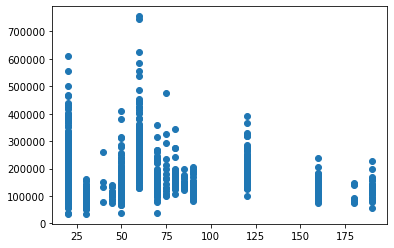

In [5]:
plt.scatter(x='MSSubClass', y='SalePrice', data=dftrain)

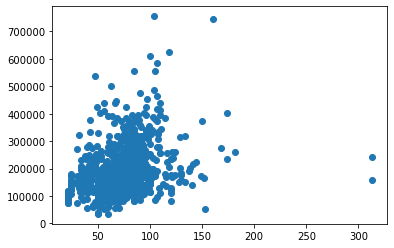

In [6]:
plt.scatter(x='LotFrontage', y='SalePrice', data=dftrain)

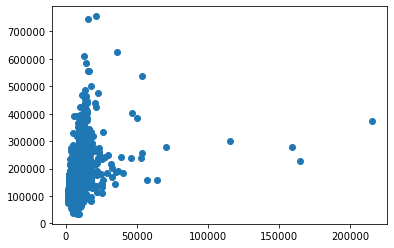

In [7]:
dftrain.query('LotFrontage > 300')
plt.scatter(x='LotArea', y='SalePrice', data=dftrain)

In [8]:
dftrain.query('LotArea > 55000')
stats.zscore(dftrain['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

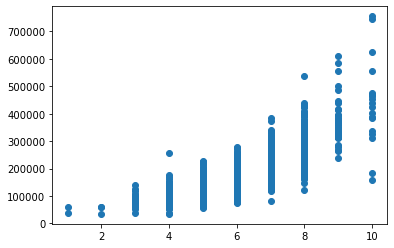

In [9]:
plt.scatter(x='OverallQual', y='SalePrice', data=dftrain)

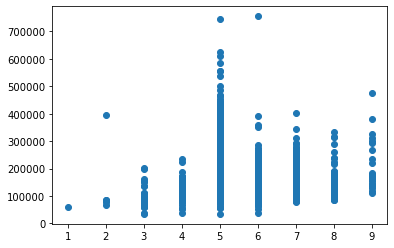

In [10]:
dftrain.query('OverallQual == 10')
plt.scatter(x='OverallCond', y='SalePrice', data=dftrain)

In [11]:
dftrain.query('OverallCond == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [12]:
dftrain.query('OverallCond == 5 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [13]:
dftrain.query('OverallCond == 6 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


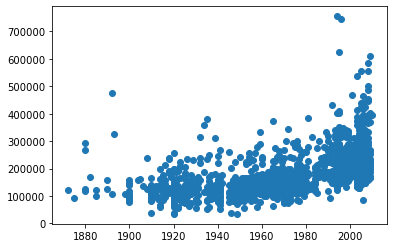

In [14]:
plt.scatter(x='YearBuilt', y='SalePrice', data=dftrain)

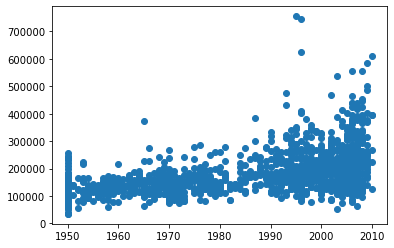

In [15]:
dftrain.query('YearBuilt < 1900 & SalePrice > 400000')
plt.scatter(x='YearRemodAdd', y='SalePrice', data=dftrain)

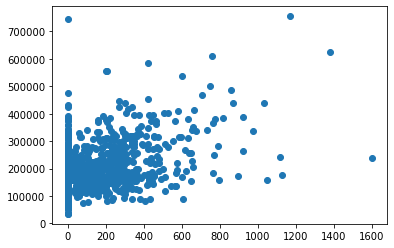

In [16]:
dftrain.query('YearRemodAdd < 1970 & SalePrice > 300000')
plt.scatter(x='MasVnrArea', y='SalePrice', data=dftrain)

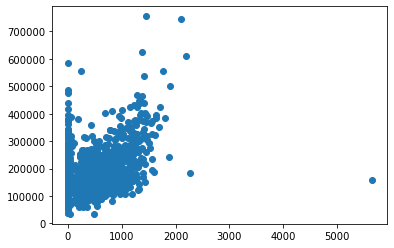

In [17]:
dftrain.query('MasVnrArea > 1500')
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=dftrain)

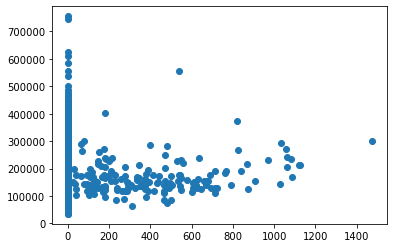

In [18]:
dftrain.query('BsmtFinSF1 > 5000')
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=dftrain)

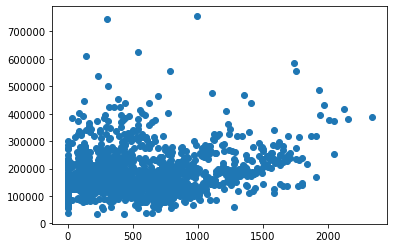

In [19]:
dftrain.query('BsmtFinSF2 > 400 & SalePrice > 500000')
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=dftrain)

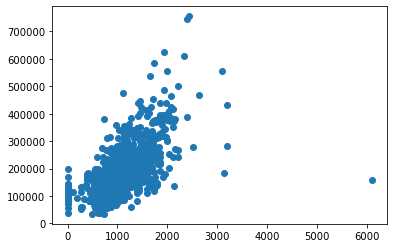

In [20]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=dftrain)

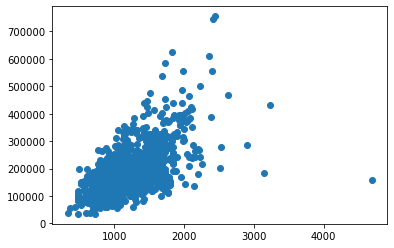

In [21]:
dftrain.query('TotalBsmtSF > 5000')
plt.scatter(x='1stFlrSF', y='SalePrice', data=dftrain)

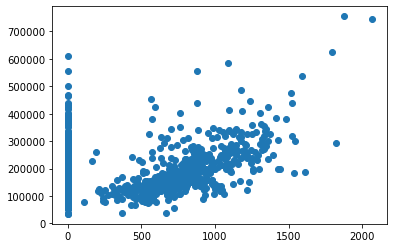

In [22]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=dftrain)

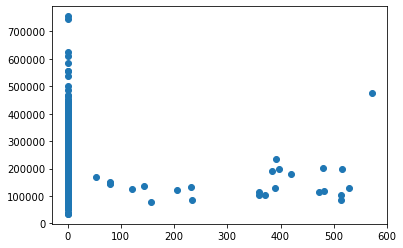

In [23]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=dftrain)

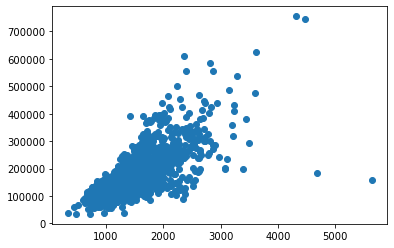

In [24]:
dftrain.query('LowQualFinSF > 500')
plt.scatter(x='GrLivArea', y='SalePrice', data=dftrain)

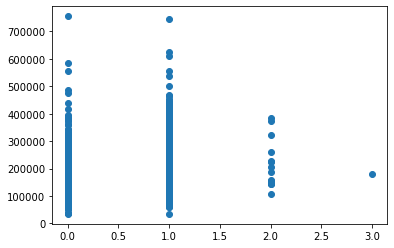

In [25]:
dftrain.query('GrLivArea > 4400')
plt.scatter(x='BsmtFullBath', y='SalePrice', data=dftrain)

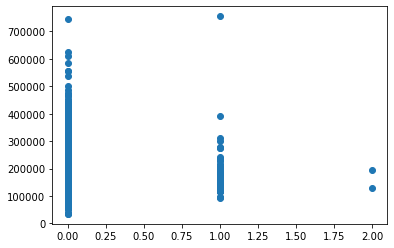

In [26]:
dftrain.query('BsmtFullBath == 3')
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=dftrain)

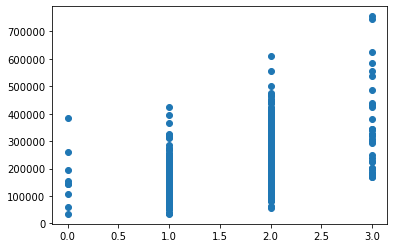

In [27]:
stats.zscore(dftrain['BsmtHalfBath']).unique()
dftrain.query('BsmtHalfBath == 2')
plt.scatter(x='FullBath', y='SalePrice', data=dftrain)

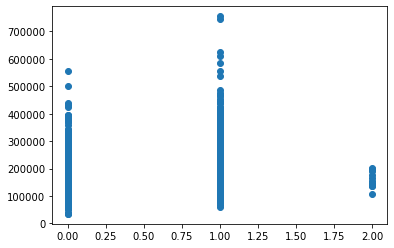

In [28]:
plt.scatter(x='HalfBath', y='SalePrice', data=dftrain)

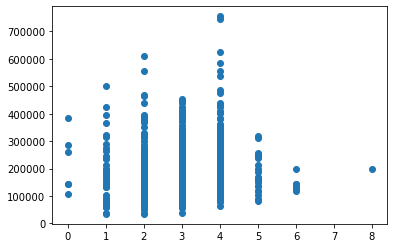

In [29]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=dftrain)

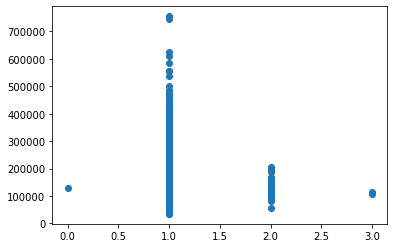

In [30]:
dftrain.query('BedroomAbvGr == 8')
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=dftrain)

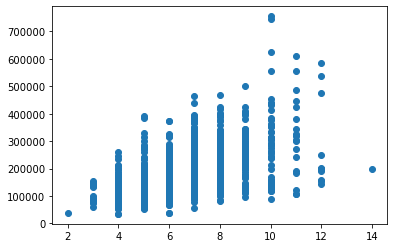

In [31]:
dftrain.query('KitchenAbvGr == 3')
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=dftrain)

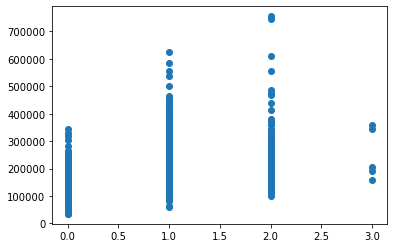

In [32]:
dftrain.query('TotRmsAbvGrd == 14')
plt.scatter(x='Fireplaces', y='SalePrice', data=dftrain)

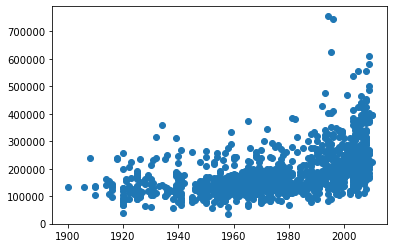

In [33]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=dftrain)

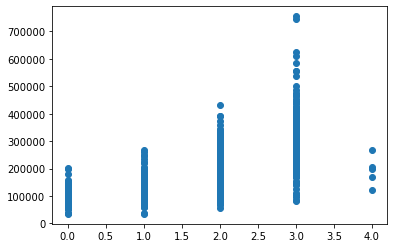

In [34]:
plt.scatter(x='GarageCars', y='SalePrice', data=dftrain)

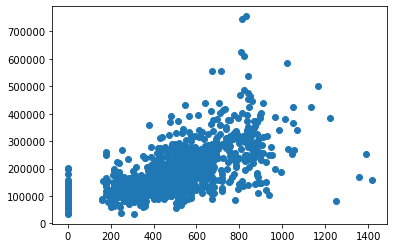

In [35]:
plt.scatter(x='GarageArea', y='SalePrice', data=dftrain)

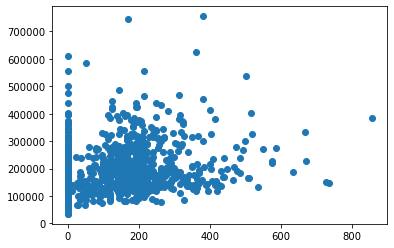

In [36]:
dftrain.query('GarageArea > 1200')
plt.scatter(x='WoodDeckSF', y='SalePrice', data=dftrain)

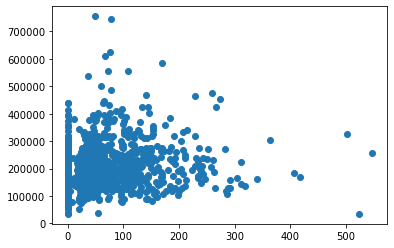

In [37]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=dftrain)

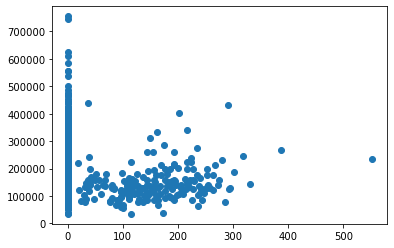

In [38]:
dftrain.query('OpenPorchSF > 500')
plt.scatter(x='EnclosedPorch', y='SalePrice', data=dftrain)

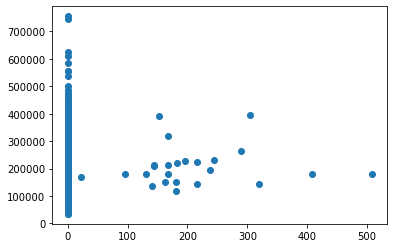

In [39]:
dftrain.query('EnclosedPorch > 500')
plt.scatter(x='3SsnPorch', y='SalePrice', data=dftrain)

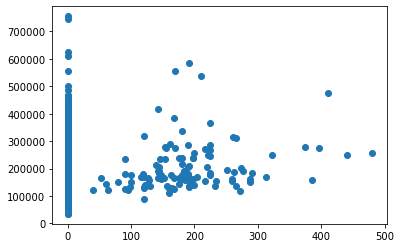

In [40]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=dftrain)

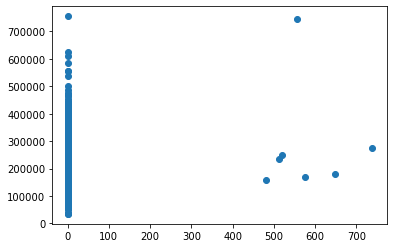

In [41]:
plt.scatter(x='PoolArea', y='SalePrice', data=dftrain)

In [42]:
values = [598, 955, 935, 1299, 250, 314, 336, 707,
          379, 1183,692, 186, 441, 186, 524, 739,
          598, 955, 636, 1062, 1191, 496, 198, 1338]
dftrain = dftrain[dftrain.Id.isin(values) == False]

pd.DataFrame(dftrain.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76
GarageFinish,76


In [43]:
dftrain['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [44]:
dftrain['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

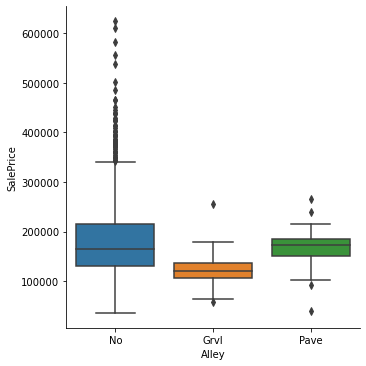

In [45]:
dftrain['Alley'].fillna('No', inplace=True)
dftrain['Alley'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="Alley", y="SalePrice", kind="box")

In [46]:
dftrain['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

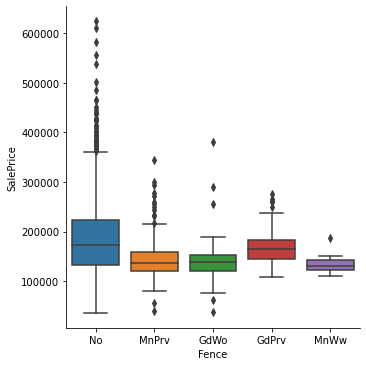

In [47]:
dftrain['Fence'].fillna('No', inplace=True)
dftrain['Fence'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="Fence", y="SalePrice", kind="box")

In [48]:
dftrain['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

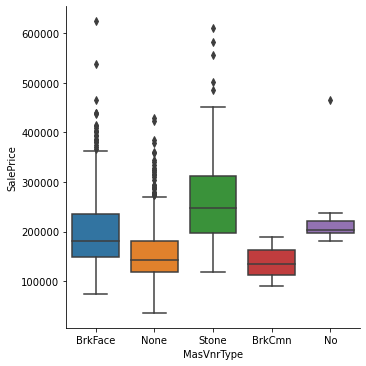

In [49]:
dftrain['MasVnrType'].fillna('No', inplace=True)
dftrain['MasVnrType'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="MasVnrType", y="SalePrice", kind="box")

In [50]:
dftrain['MasVnrArea'].fillna(0, inplace=True)
dftest['MasVnrArea'].fillna(0, inplace=True)
dftrain['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

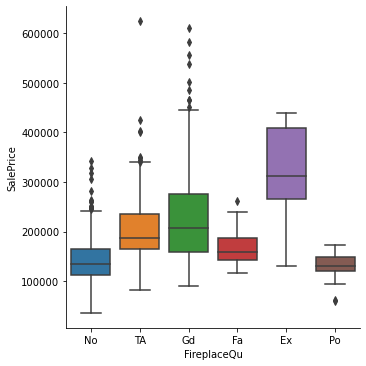

In [51]:
dftrain['FireplaceQu'].fillna('No', inplace=True)
dftest['FireplaceQu'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="FireplaceQu", y="SalePrice", kind="box")

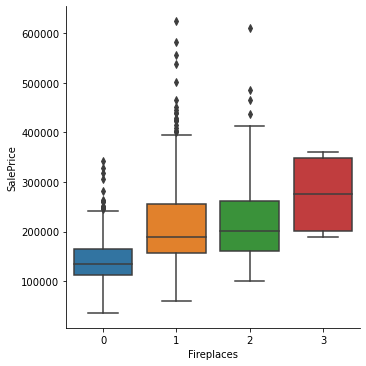

In [52]:
sns.catplot(data=dftrain, x="Fireplaces", y="SalePrice", kind="box")

In [53]:
dftrain['LotFrontage'].fillna(0, inplace=True)
dftest['LotFrontage'].fillna(0, inplace=True)
dftrain['GarageYrBlt'].corr(dftrain['YearBuilt'])

0.8289827595060573

In [54]:
dftrain['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

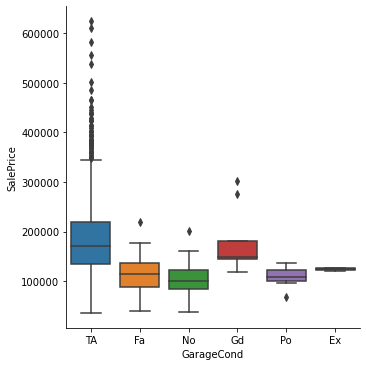

In [55]:
dftrain['GarageCond'].fillna('No', inplace=True)
dftest['GarageCond'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="GarageCond", y="SalePrice", kind="box")

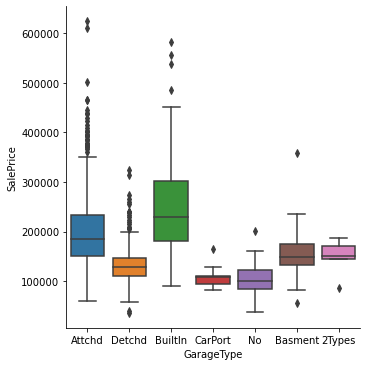

In [56]:
dftrain['GarageType'].fillna('No', inplace=True)
dftest['GarageType'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="GarageType", y="SalePrice", kind="box")

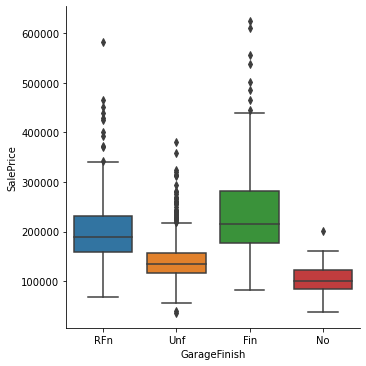

In [57]:
dftrain['GarageFinish'].fillna('No', inplace=True)
dftest['GarageFinish'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="GarageFinish", y="SalePrice", kind="box")

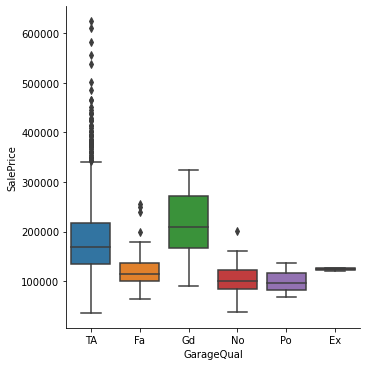

In [58]:
dftrain['GarageQual'].fillna('No', inplace=True)
dftest['GarageQual'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="GarageQual", y="SalePrice", kind="box")

In [59]:
dftrain['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

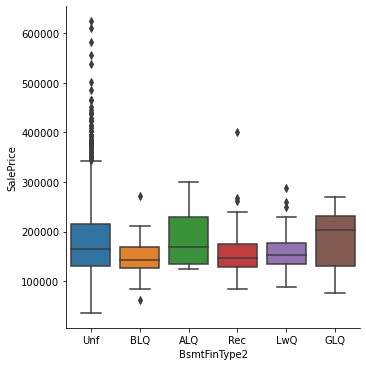

In [60]:
dftrain['BsmtFinType2'].fillna('Unf', inplace=True)
dftest['BsmtFinType2'].fillna('Unf', inplace=True)
sns.catplot(data=dftrain, x="BsmtFinType2", y="SalePrice", kind="box")

In [61]:
dftrain['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

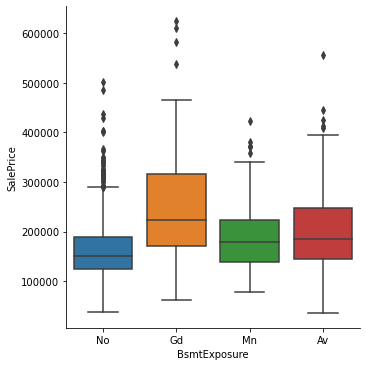

In [62]:
dftrain['BsmtExposure'].fillna('No', inplace=True)
dftest['BsmtExposure'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="BsmtExposure", y="SalePrice", kind="box")

In [63]:
dftrain['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

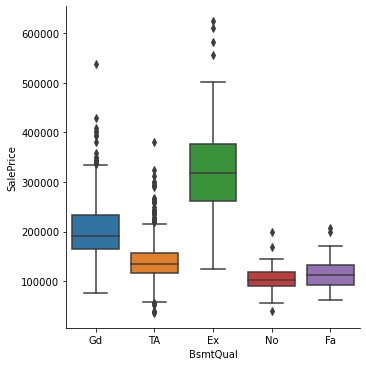

In [64]:
dftrain['BsmtQual'].fillna('No', inplace=True)
dftest['BsmtQual'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="BsmtQual", y="SalePrice", kind="box")

In [65]:
dftrain['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

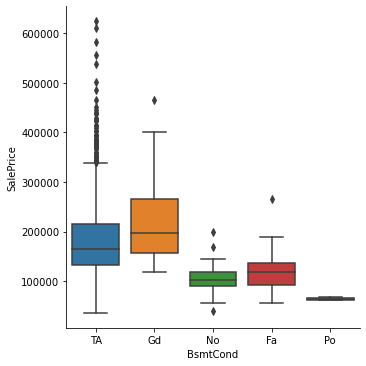

In [66]:
dftrain['BsmtCond'].fillna('No', inplace=True)
dftest['BsmtCond'].fillna('No', inplace=True)
sns.catplot(data=dftrain, x="BsmtCond", y="SalePrice", kind="box")

In [67]:
dftrain['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

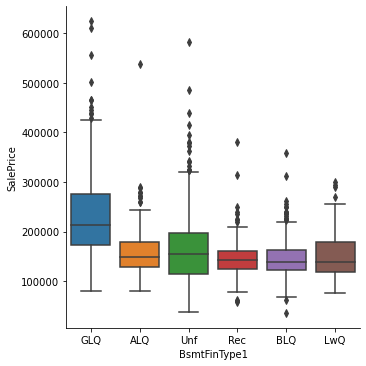

In [68]:
dftrain['BsmtFinType1'].fillna('Unf', inplace=True)
dftest['BsmtFinType1'].fillna('Unf', inplace=True)
sns.catplot(data=dftrain, x="BsmtFinType1", y="SalePrice", kind="box")

In [69]:
dftrain['MasVnrArea'].fillna(0, inplace=True)
dftest['MasVnrArea'].fillna(0, inplace=True)
dftrain['Electrical'].fillna('SBrkr', inplace=True)
dftest['Electrical'].fillna('SBrkr', inplace=True)
dftrain = dftrain.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
dftest = dftest.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [70]:
dftrain['houseage'] = dftrain['YrSold'] - dftrain['YearBuilt']
dftest['houseage'] = dftest['YrSold'] - dftest['YearBuilt']
dftrain['houseremodelage'] = dftrain['YrSold'] - dftrain['YearRemodAdd']
dftest['houseremodelage'] = dftest['YrSold'] - dftest['YearRemodAdd']
dftrain['totalsf'] = dftrain['1stFlrSF'] + dftrain['2ndFlrSF'] + dftrain['BsmtFinSF1'] + dftrain['BsmtFinSF2']
dftest['totalsf'] = dftest['1stFlrSF'] + dftest['2ndFlrSF'] + dftest['BsmtFinSF1'] + dftest['BsmtFinSF2']

In [71]:
dftrain['totalarea'] = dftrain['GrLivArea'] + dftrain['TotalBsmtSF']
dftest['totalarea'] = dftest['GrLivArea'] + dftest['TotalBsmtSF']
dftrain['totalbaths'] = dftrain['BsmtFullBath'] + dftrain['FullBath'] + 0.5 * (dftrain['BsmtHalfBath'] + dftrain['HalfBath']) 
dftest['totalbaths'] = dftest['BsmtFullBath'] + dftest['FullBath'] + 0.5 * (dftest['BsmtHalfBath'] + dftest['HalfBath']) 

In [72]:
dftrain['totalporchsf'] = dftrain['OpenPorchSF'] + dftrain['3SsnPorch'] + dftrain['EnclosedPorch'] + dftrain['ScreenPorch'] + dftrain['WoodDeckSF']
dftest['totalporchsf'] = dftest['OpenPorchSF'] + dftest['3SsnPorch'] + dftest['EnclosedPorch'] + dftest['ScreenPorch'] + dftest['WoodDeckSF']

In [73]:
dftrain = dftrain.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
dftest = dftest.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<AxesSubplot:>

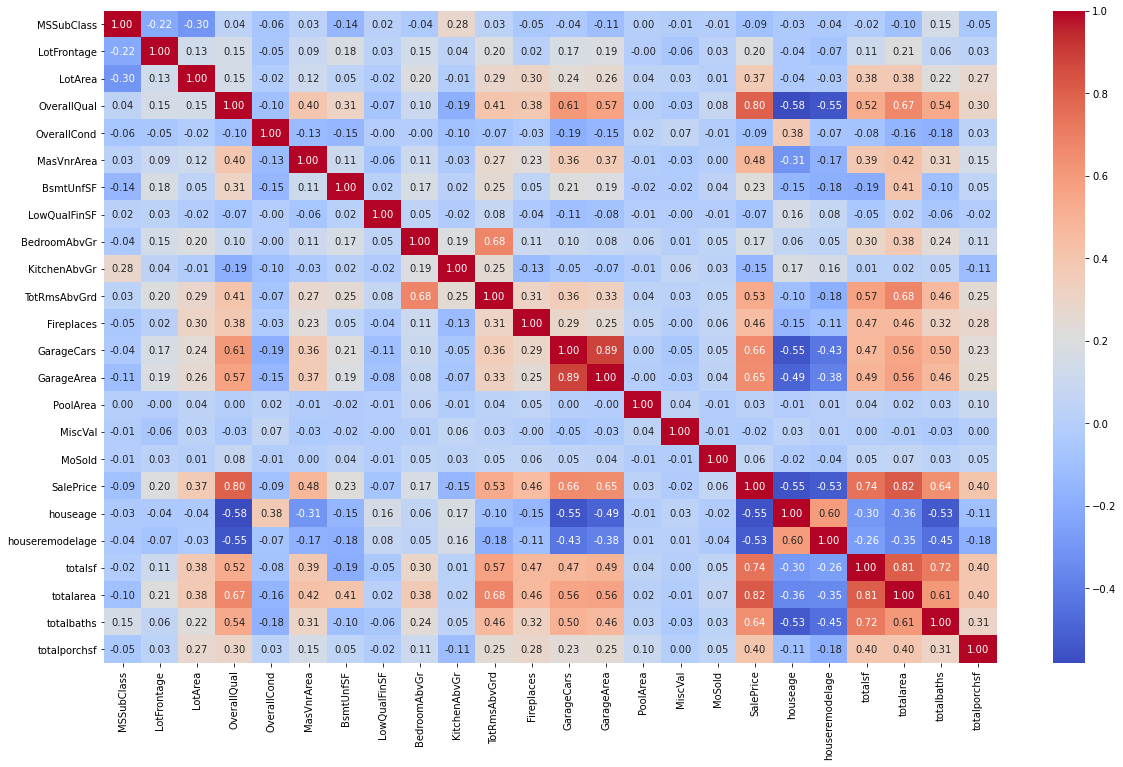

In [74]:
correlation_matrix = dftrain.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

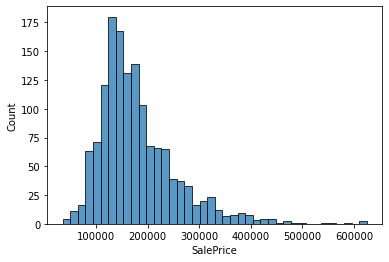

In [75]:
dftrain = dftrain.drop(columns=['GarageArea'])
dftest = dftest.drop(columns=['GarageArea'])
sns.histplot(
    dftrain,
    x=dftrain['SalePrice']
)

In [76]:
dftrain['SalePrice'] = np.log1p(dftrain['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

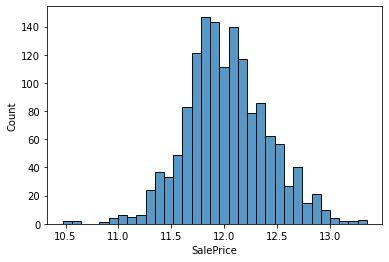

In [77]:
sns.histplot(
    dftrain,
    x=dftrain['SalePrice']
)

In [78]:
dftrain.dtypes[dftrain.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [79]:
dftrain.dtypes[dftrain.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

## Models

Project had goals of making predictions through advanced regression. The model that I will eventually conclude with is going to be a stacked regression model. I will be creating several regression models such as linear, random forest, xgb, ridge, gradient boosting, lgbm, catboosting, and voting. I will then have the best of those models be combined in a stacked regression model and the score I recieve from there will be my results.

Linear Regression -	9.510501616810296e+16
Random Forest Regression - 0.1339500658461279
XGB Regression - 0.11965682811517063
Ridge - 0.10894022173825084
Gradient Boosting Regression - 0.11333215220060736
LGBM Regression - 0.1275678077793979
Cat Boose Regression - 0.11313058072563338
Voting Regression - 0.11956123663283695

Those are the scores that I received from each of the models.

In [80]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [81]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [82]:
num_cols = dftrain.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [83]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [84]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [85]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [86]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [87]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [88]:
X = dftrain.drop('SalePrice', axis=1)
y = dftrain['SalePrice']

In [89]:
X_preprocessed = pipeline.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred_lr = lr.predict(X_test)

In [94]:
mean_squared_error(y_test, y_pred_lr)

9.510501616810296e+16

In [95]:
RFR = RandomForestRegressor(random_state=13)

In [96]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [97]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [98]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [99]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1339500658461279

In [100]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [101]:
XGB = XGBRegressor(random_state=13)

In [102]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [103]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [104]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [105]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11965682811517063

In [106]:
ridge = Ridge()

In [107]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [108]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [109]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [110]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10894022173825084

In [111]:
GBR = GradientBoostingRegressor()

In [112]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [113]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [114]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [115]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11333215220060736

In [116]:
lgbm_regressor = lgb.LGBMRegressor()

In [117]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [118]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [119]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [122]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.1275678077793979

In [123]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [124]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [125]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [126]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001AC0AA700A0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [127]:
np.sqrt(-1 * cat_cv.best_score_)

0.11313058072563338

In [128]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [129]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=15,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1.0, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=5, solver='lsqr'))],
                weights=[2, 3, 1])

In [130]:
y_pred_vr = vr.predict(X_test)
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11956123663283695

In [131]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 106
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train se

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=15,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=1,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=5,
                                                                     solver='lsqr'))],
                                                  weights=[2, 3, 1]))

In [132]:
y_pred_stack = stackreg.predict(X_test)
mean_squared_error(y_test, y_pred_stack, squared=False)

0.11966001781311514

## Results and Analysis:

The goal of the project was to compare the models with Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. With that in mind, the best-performing regression models (Gradient Boosting, XGBoost, CatBoost, LightGBM, Random Forest).

With those models, the next step of making a solid prediction model was to implement Stacked Regression. Stacking approach often leads to improved predictive performance compared to any of the individual base models and the final result was a RMSE of 0.11966001781311514.

In [133]:
df_test_preprocess = pipeline.transform(dftest)

In [134]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = dftest[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

## Conclusion

I had a lot of fun with this project. It really felt like it was calling me between the life situation I am currently in, and the fact that the database was from a place I lived for a chunk of my life. I learned a lot doing the project too. I really was dragging my feet when I was starting the assignment, because I don't have a lot of confidence with Machine Learning topics, but it was really fun once I got started with the work. I learned new regression techniques which was also rewarding.

One honest takeaway was that I wasn't sure how deep learning this was. Like it felt like a supervised learning project, but it was listed as a potential project and the assignment guidelines mention doing a regression project counts. But all of the other projects had neural networks and this was just regression. I really hope this is a deep learning project because the stacked regression model did take some time to run which makes me feel like it falls under the umbrella of deep learning, but I am not sure entirely.

Hope everyone the best of luck in their classes, I believe in you all.